In [20]:
import pandas as pd
import wbgapi as wb
import numpy as np
import sklearn.cluster as cluster

import matplotlib.pyplot as plt
%matplotlib inline

In [281]:
def norm(array):
    """ Returns array normalised to [0,1]. Array can be a numpy array 
    or a column of a dataframe"""

    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array-min_val) / (max_val-min_val)
    
    return scaled


def norm_df(df):
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine. 
    """
    
    # iterate over all columns
    for col in df.columns[1:]:     # excluding the first column
        df[col] = norm(df[col])
        
    return df

In [282]:
country_codes = ['EGY','MDG','NGA','IND','JPN','QAT','ITA','ESP','FRA','DEU']

In [283]:
# write your code here

# indicators for getting data related to specified indicator
indicator_ids= ['FI.RES.TOTL.CD','NY.GDP.PCAP.CD','SP.POP.GROW','PA.NUS.FCRF','NY.GDP.PETR.RT.ZS']

# mapping a readable name to each indicators to avoid confusion
indicator_dict = {
    'FI.RES.TOTL.CD':'TOTAL_RESERVE',
    'NY.GDP.PCAP.CD':'GDP',
    'SP.POP.GROW' : 'POPULATION',
    'PA.NUS.FCRF':'EXCHANGE_RATE',
    'NY.GDP.PETR.RT.ZS':'OIL_RENT'
}

In [284]:
wb.series.info(indicator_ids)

id,value
NY.GDP.PCAP.CD,GDP per capita (current US$)
PA.NUS.FCRF,"Official exchange rate (LCU per US$, period average)"
NY.GDP.PETR.RT.ZS,Oil rents (% of GDP)
SP.POP.GROW,Population growth (annual %)
FI.RES.TOTL.CD,"Total reserves (includes gold, current US$)"
,5 elements


In [285]:
raw_df  = wb.data.DataFrame(indicator_ids, country_codes, time=range(2000, 2009))
df = raw_df
# print(df)
df.reset_index()
df = df.reset_index(level=['economy', 'series'])
df = df.set_axis(['country','indicators','2012','2013','2014','2015','2016','2017','2018','2019','2020'],axis=1)
df = df.set_index('indicators')
df = df.rename(index=indicator_dict)
df = df.reset_index(level=['indicators'])
df = df.set_index(['country','indicators'])
stacked = df.stack()
df = stacked.unstack('indicators')
print(df)
df['GDP'].isnull().values.any()

indicators    EXCHANGE_RATE           GDP   OIL_RENT  POPULATION  \
country                                                            
DEU     2012       1.082705  23694.760483   0.019089    0.135432   
        2013       1.116533  23628.327212   0.014586    0.168225   
        2014       1.057559  25197.265600   0.015561    0.168128   
        2015       0.884048  30310.357596   0.016072    0.055363   
        2016       0.803922  34106.658122   0.018199   -0.021710   
...                     ...           ...        ...         ...   
QAT     2016       3.640000  42124.940842  34.057801    9.978287   
        2017       3.640000  51455.950943  38.876673   13.869735   
        2018       3.640000  59530.561000  34.540148   16.700200   
        2019       3.640000  65421.376917  30.798918   17.512207   
        2020       3.640000  80234.190834  31.114773   16.475576   

indicators    TOTAL_RESERVE  
country                      
DEU     2012   8.749687e+10  
        2013   8.213189e+

False

In [286]:
df = norm_df(df)

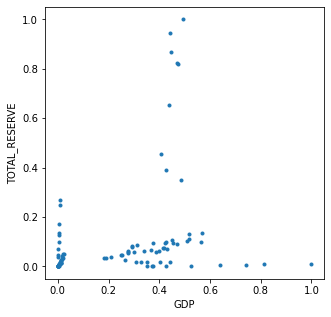

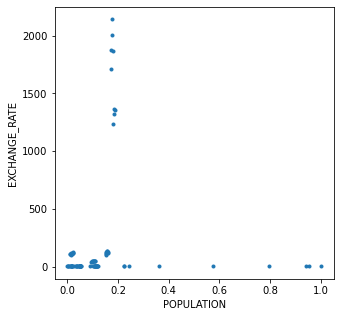

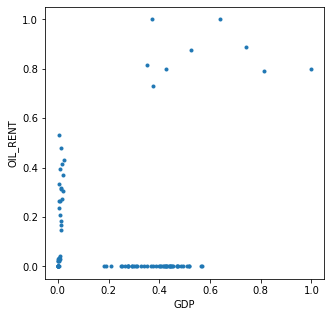

In [287]:
def makeplot(df, col1, col2):
    """
    Produces a square plot of two columns of dataframe df using small circle 
    symbols.
    """
    
    plt.figure(figsize=(5.0,5.0))
    plt.plot(df[col1], df[col2], "o", markersize=3)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
    
    
# exploratory plots
makeplot(df, "GDP", "TOTAL_RESERVE")
makeplot(df, "POPULATION", "EXCHANGE_RATE")
makeplot(df, "GDP", "OIL_RENT")

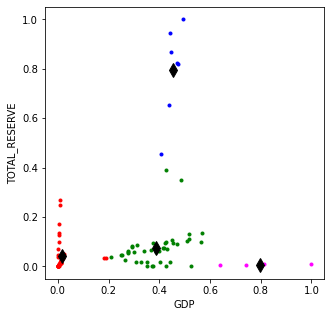

In [289]:
####### kmeans set up the clusterer, 4 expected clusters
kmeans = cluster.KMeans(n_clusters=4)

# extract columns for fitting
df_fit = df[["GDP", "TOTAL_RESERVE"]].copy()
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green", "magenta"]
for l in range(4):     # loop over the different labels
    plt.plot(df_fit["GDP"][labels==l], df_fit["TOTAL_RESERVE"][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(4):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
    
plt.xlabel("GDP")
plt.ylabel("TOTAL_RESERVE")
plt.show()